# **Bachelor's thesis - Analysis of the dynamics of the development of the COVID-19 epidemic in European countries**
Author: Tomasz Karolewski

Promoter: Ph.D. Krzysztof Gogolewski 

Data source: COVID-19 - Johns Hopkins University


#9. Results submit

In [ ]:
predict_df

Albania     Armenia      Austria  Azerbaijan     Belarus  \
height     305.711214  650.711714  1447.121714  308.047929  143.097429   
left_base   77.000000  125.000000   125.000000   27.984443  118.000000   
left_x     519.000000  514.000000   542.000000  551.015557  516.000000   
left_y       1.055500   28.643643    35.340357   48.581857   70.522571   

               Belgium  Bosnia and Herzegovina    Bulgaria      Croatia  \
height     1398.780071              241.509571  667.096143  1308.745000   
left_base   123.000000              125.000000  113.000000   125.000000   
left_x      549.000000              535.000000  530.000000   533.000000   
left_y      130.540500                5.257429    9.141786    22.720357   

                Cyprus  ...      Russia      Serbia     Slovakia     Slovenia  \
height     3140.281643  ...  144.333714  985.689929  1992.763643  1537.344286   
left_base    87.000000  ...   61.000000   88.000000   125.000000   125.000000   
left_x      619.000000  ...  591.000000  520.000000   548.000000   532.000000   
left_y      103.873500  ...  124.369071   11.465500     9.960929    23.148714   

                 Spain      Sweden  Switzerland      Turkey     Ukraine  \
height     1885.043143  669.993929  1587.361286  189.848786  559.433929   
left_base    65.000000   78.000000    79.000000   13.000000  125.000000   
left_x      641.000000  628.000000   627.000000  693.000000  521.000000   
left_y       33.447357   54.580214   104.178786  220.291214   23.705214   

           United Kingdom  
height        1857.087357  
left_base      103.000000  
left_x         603.000000  
left_y         457.802929  

[4 rows x 41 columns]

Kmeans, Hclust for pca

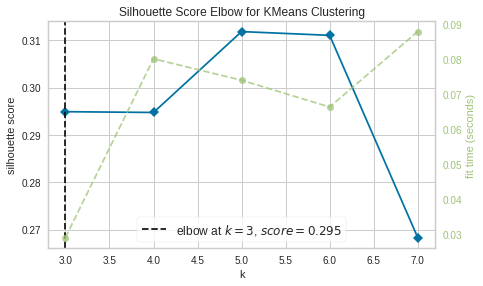

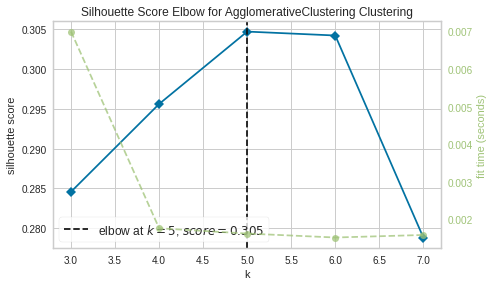

In [ ]:
#@title
#Silhouette Score for K means
model = KMeans(random_state=100)

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(pca_df)
visualizer.show()

#Silhouette Score for Hierarchical clustering
model = AgglomerativeClustering(linkage='ward', affinity='euclidean')

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(pca_df)
visualizer.show()

4 clusters: 
Cluster 1: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Finland', 'Germany', 'Hungary', 'Italy', 'North Macedonia', 'Moldova', 'Norway', 'Poland', 'Romania', 'Russia', 'Sweden', 'Turkey', 'Ukraine']
Cluster 2: 
['Cyprus', 'Denmark', 'France', 'Greece', 'Iceland', 'Ireland', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom']
Cluster 3: 
['Austria', 'Belgium', 'Croatia', 'Czechia', 'Netherlands', 'Slovakia', 'Slovenia']
Cluster 4: 
['Estonia', 'Georgia', 'Latvia', 'Lithuania', 'Serbia']


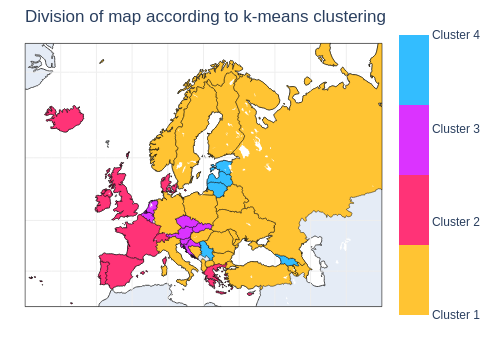

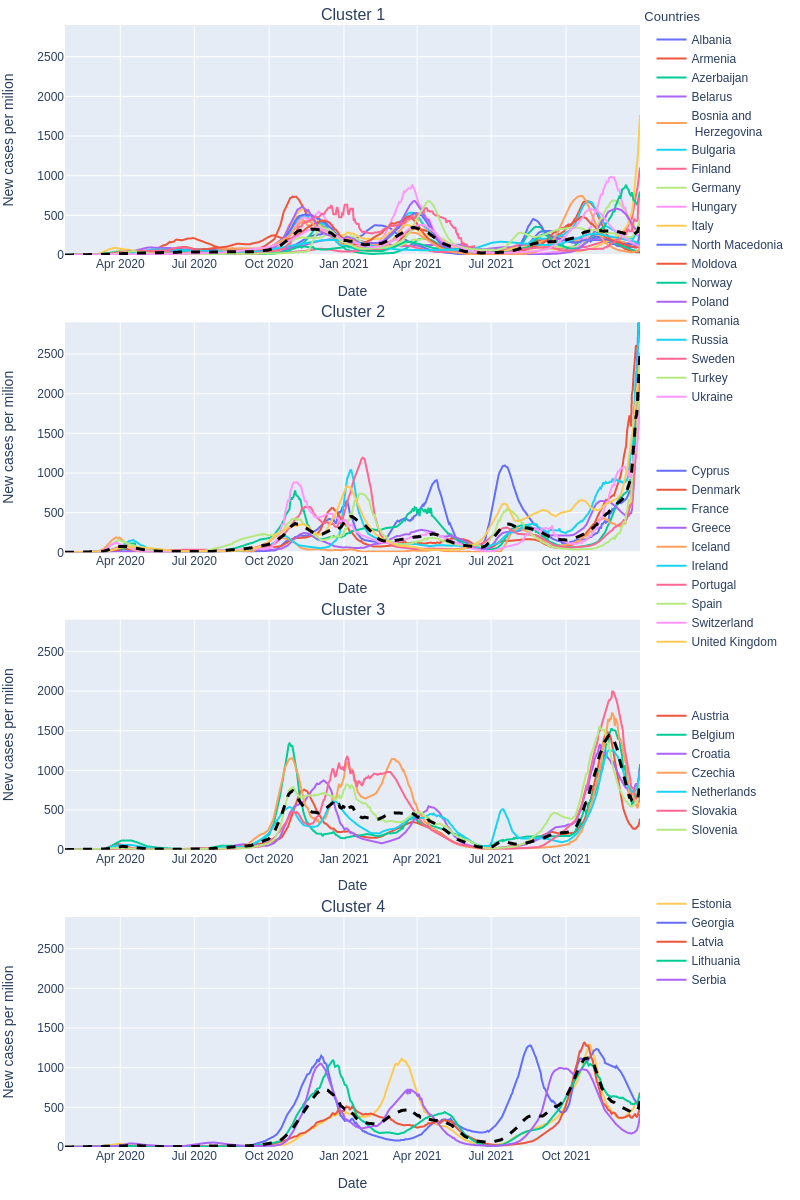

In [ ]:
#@title
#n+1 number of clusters
n=3
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = KMeans(n_clusters=n+1, random_state=100).fit(data)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)

clusters_list_km_pca = clusters_list.copy()


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.25, "rgb(255, 196, 51)"),
              (0.25, "rgb(255, 51, 119)"), (0.5, "rgb(255, 51, 119)"),
              (0.5, "rgb(219, 51, 255)"),  (0.75, "rgb(219, 51, 255)"),
              (0.75, "rgb(51, 189, 255)"),  (1.00, "rgb(51, 189, 255)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=4, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to k-means clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.06)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1200, width=800, margin=config_margin, legend_tracegroupgap=55, title=config_title)
display(Image(fig2.to_image()))

print("\n")

5 clusters: 
Cluster 1: 
['Austria', 'Belgium', 'Croatia', 'Georgia', 'Netherlands', 'Slovenia']
Cluster 2: 
['Cyprus', 'Denmark', 'France', 'Greece', 'Iceland', 'Ireland', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom']
Cluster 3: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Finland', 'Germany', 'Hungary', 'Italy', 'North Macedonia', 'Moldova', 'Norway', 'Poland', 'Romania', 'Russia', 'Sweden', 'Turkey', 'Ukraine']
Cluster 4: 
['Czechia', 'Slovakia']
Cluster 5: 
['Estonia', 'Latvia', 'Lithuania', 'Serbia']


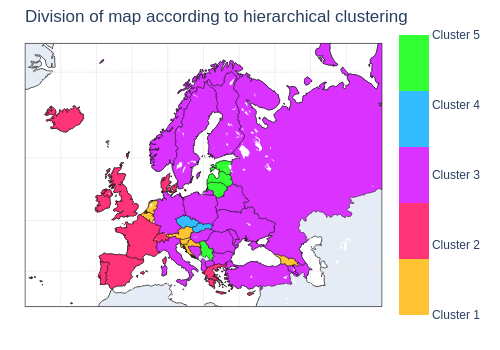

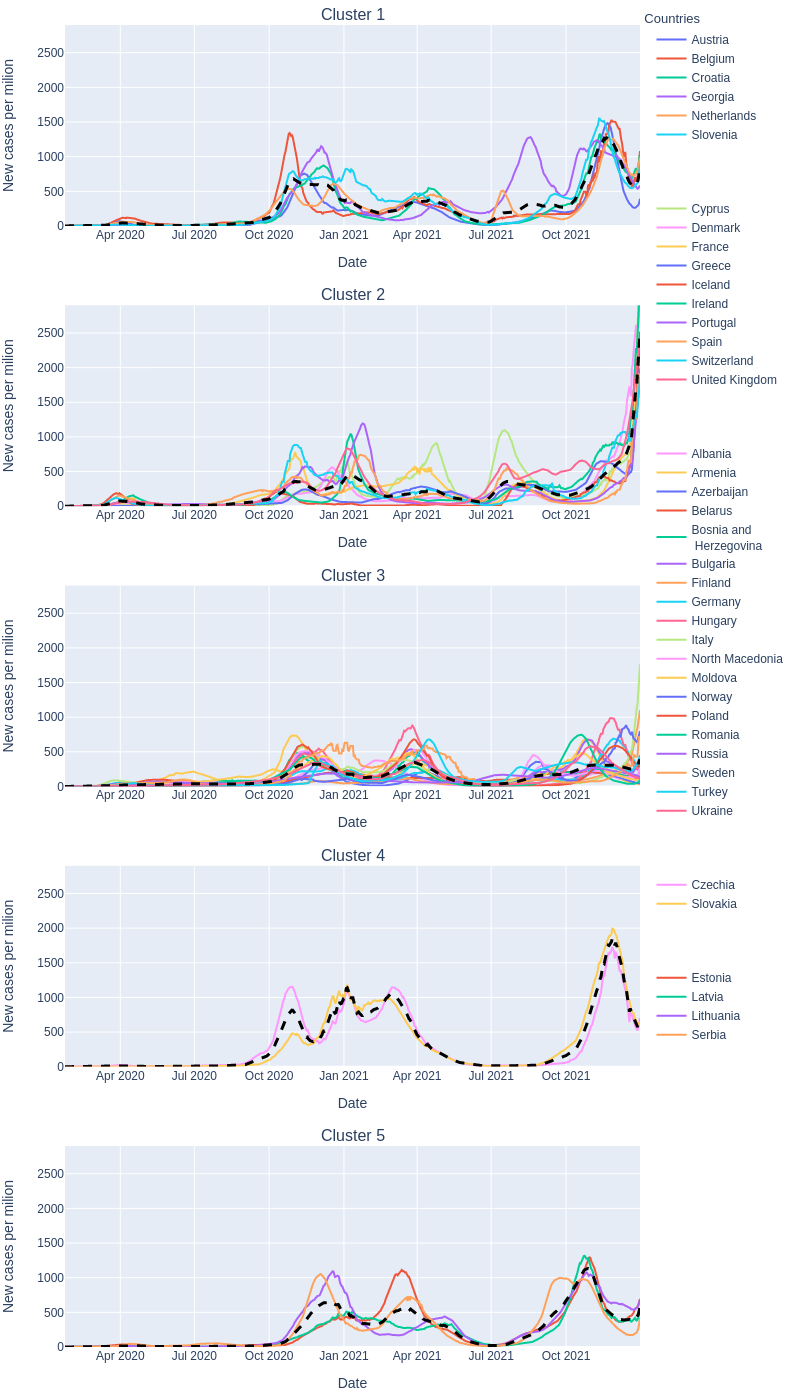

In [ ]:
#@title
#n+1 number of clusters
n=4
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = AgglomerativeClustering(n_clusters=n+1, linkage='ward', affinity='euclidean').fit(data)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.2, "rgb(255, 196, 51)"),
              (0.2, "rgb(255, 51, 119)"), (0.4, "rgb(255, 51, 119)"),
              (0.4, "rgb(219, 51, 255)"),  (0.6, "rgb(219, 51, 255)"),
              (0.6, "rgb(51, 189, 255)"),  (0.8, "rgb(51, 189, 255)"),
              (0.8, "rgb(51, 255, 53)"),  (1.0, "rgb(51, 255, 53)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=5, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to hierarchical clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.06)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1400, width=800, margin=config_margin, legend_tracegroupgap=55, title=config_title)
display(Image(fig2.to_image()))

print("\n")

Prediction

In [ ]:
model = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=5, n_estimators=500, oob_score=True, random_state=100)
#model = XGBRegressor(booster='gblinear', learning_rate=0.33, max_depth=1, min_child_weight=0, n_estimators=500, n_jobs=-1, objective='reg:squarederror', random_state=100)


model.fit(X_train_df, y_train_df.values.ravel())

predictions = pd.DataFrame(model.predict(predict_df.T), index=predict_df.T.index, columns=['predicted_right_base'])
validation = pd.DataFrame(model.predict(validate_df.T), index=validate_df.T.index, columns=['predicted_right_base'])

pd.concat([predict_df.T, predictions], axis=1)

height   left_base      left_x      left_y  \
Albania                  305.711214   77.000000  519.000000    1.055500   
Armenia                  650.711714  125.000000  514.000000   28.643643   
Austria                 1447.121714  125.000000  542.000000   35.340357   
Azerbaijan               308.047929   27.984443  551.015557   48.581857   
Belarus                  143.097429  118.000000  516.000000   70.522571   
Belgium                 1398.780071  123.000000  549.000000  130.540500   
Bosnia and Herzegovina   241.509571  125.000000  535.000000    5.257429   
Bulgaria                 667.096143  113.000000  530.000000    9.141786   
Croatia                 1308.745000  125.000000  533.000000   22.720357   
Cyprus                  3140.281643   87.000000  619.000000  103.873500   
Czechia                 1713.701786  118.000000  555.000000   16.240571   
Denmark                 2761.439000  101.000000  605.000000   56.635286   
Estonia                 1273.317071  125.000000  520.000000   20.468714   
Finland                  947.835571  101.000000  605.000000   74.319429   
France                  2177.717643   84.000000  622.000000   59.703071   
Georgia                  807.971857   42.000000  612.000000  429.004143   
Germany                  666.809429  125.000000  549.000000   21.405429   
Greece                  2121.767857   91.000000  615.000000  205.585643   
Hungary                  982.347500  114.000000  557.000000    5.367571   
Iceland                 2287.458000  108.000000  598.000000   71.255714   
Ireland                 2782.966786  112.000000  594.000000  230.122143   
Italy                   1509.596929   79.000000  627.000000   43.370786   
Latvia                  1295.835286  105.000000  534.000000   20.301786   
Lithuania               1064.627071  116.000000  525.000000   11.272357   
North Macedonia          328.380857   15.796262  560.203738  125.654714   
Moldova                  467.483786  125.000000  509.000000   15.080214   
Netherlands             1164.551929   63.000000  611.000000   94.942500   
Norway                   808.669429   64.000000  626.000000   76.471571   
Poland                   582.827929  125.000000  551.000000    3.028786   
Portugal                1732.113071   87.000000  619.000000   58.188143   
Romania                  743.971000  105.000000  530.000000    2.129143   
Russia                   144.333714   61.000000  591.000000  124.369071   
Serbia                   985.689929   88.000000  520.000000   11.465500   
Slovakia                1992.763643  125.000000  548.000000    9.960929   
Slovenia                1537.344286  125.000000  532.000000   23.148714   
Spain                   1885.043143   65.000000  641.000000   33.447357   
Sweden                   669.993929   78.000000  628.000000   54.580214   
Switzerland             1587.361286   79.000000  627.000000  104.178786   
Turkey                   189.848786   13.000000  693.000000  220.291214   
Ukraine                  559.433929  125.000000  521.000000   23.705214   
United Kingdom          1857.087357  103.000000  603.000000  457.802929   

                        predicted_right_base  
Albania                            50.355954  
Armenia                            51.631466  
Austria                            52.409304  
Azerbaijan                         53.759641  
Belarus                            42.052632  
Belgium                            41.590558  
Bosnia and Herzegovina             49.328807  
Bulgaria                           51.344494  
Croatia                            52.457378  
Cyprus                             43.214570  
Czechia                            52.395304  
Denmark                            51.352989  
Estonia                            52.538488  
Finland                            49.374102  
France                             51.311601  
Georgia                            39.030788  
Germany                            51.250198  
Greece                          



 peaks before removing subpeaks:  [319 389 596 660]
 subpeaks indexes:  [0, 3]
 peaks:  [389 596]
 left angles:  [67.33790474 75.8628694 ]
 right angles:  [79.60767563]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



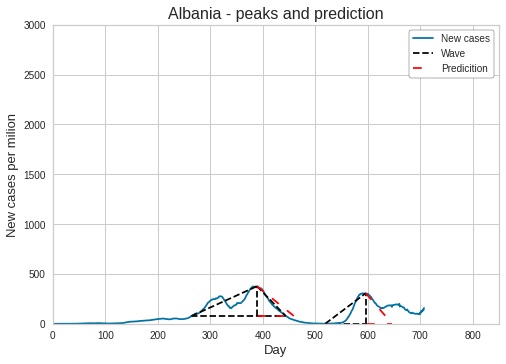



 peaks before removing subpeaks:  [158 280 430 639]
 subpeaks indexes:  []
 peaks:  [158 280 430 639]
 left angles:  [72.73655613 85.0531286  79.49292912 79.12609497]
 right angles:  [70.40619187 81.87960302 79.04988796]


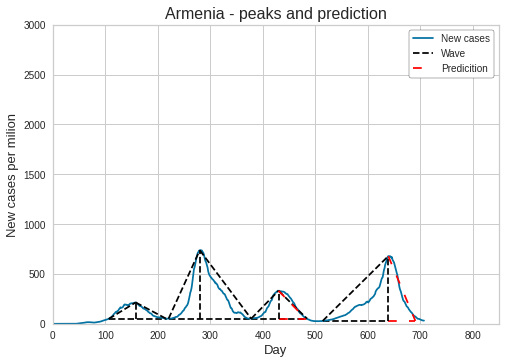



 peaks before removing subpeaks:  [ 64 294 427 667]
 subpeaks indexes:  []
 peaks:  [ 64 294 427 667]
 left angles:  [73.83542121 87.32332675 76.41855754 85.06313855]
 right angles:  [48.53363974 82.18040782 78.0404728 ]


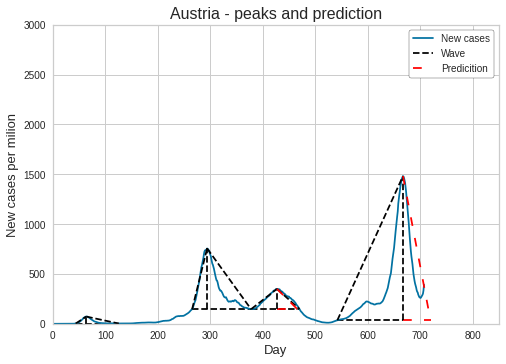



 peaks before removing subpeaks:  [159 319 443 579 647]
 subpeaks indexes:  [4]
 peaks:  [159 319 443 579]
 left angles:  [41.68404255 80.45746227 71.69451837 84.80924475]
 right angles:  [25.66282768 81.32532421 74.97632166]


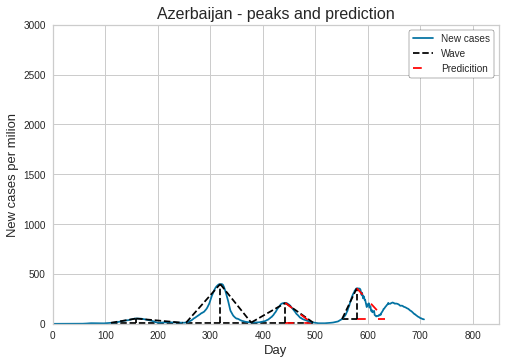



 peaks before removing subpeaks:  [116 328 634]
 subpeaks indexes:  []
 peaks:  [116 328 634]
 left angles:  [63.34678756 67.27743888 50.49056479]
 right angles:  [48.23580361 46.98198731]


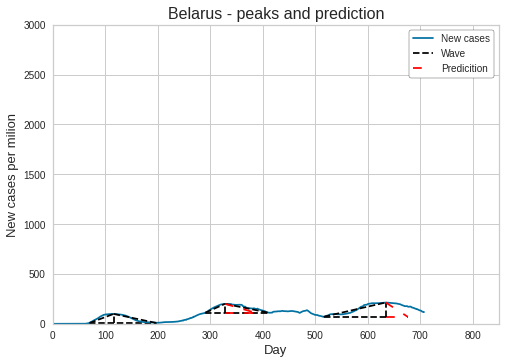



 peaks before removing subpeaks:  [ 76 276 429 672]
 subpeaks indexes:  []
 peaks:  [ 76 276 429 672]
 left angles:  [75.62172801 88.52957518 72.89100347 84.97469219]
 right angles:  [59.12478886 86.84969583 77.55688277]


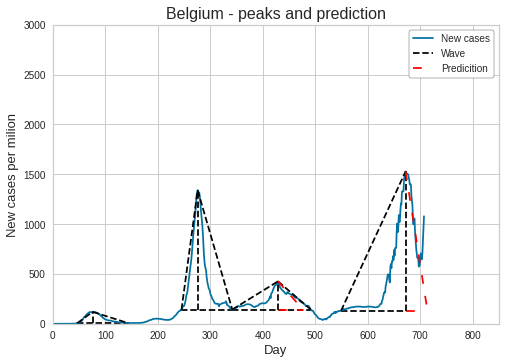



 peaks before removing subpeaks:  [285 429 660]
 subpeaks indexes:  []
 peaks:  [285 429 660]
 left angles:  [85.67894085 81.93038127 62.63491791]
 right angles:  [78.00577018 83.79205423]


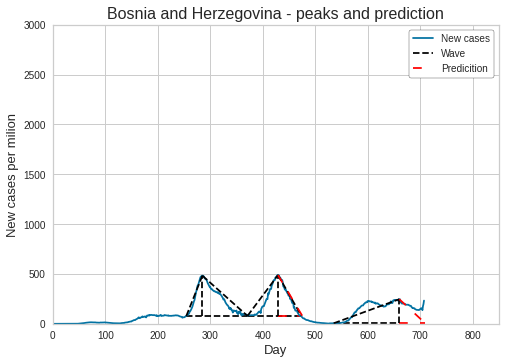



 peaks before removing subpeaks:  [297 426 643 706]
 subpeaks indexes:  [3]
 peaks:  [297 426 643]
 left angles:  [84.90325421 81.87775513 80.38587804]
 right angles:  [81.80966945 83.54021295]


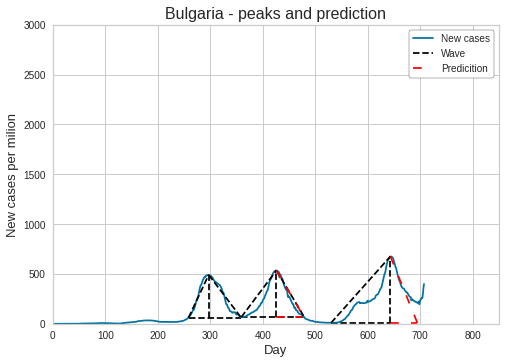



 peaks before removing subpeaks:  [318 447 658]
 subpeaks indexes:  []
 peaks:  [318 447 658]
 left angles:  [85.59507713 82.79449295 84.54415283]
 right angles:  [84.97253582 84.7724966 ]


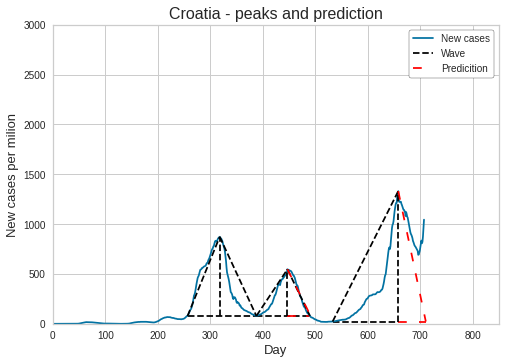



 peaks before removing subpeaks:  [347 457 541 706]
 subpeaks indexes:  []
 peaks:  [347 457 541 706]
 left angles:  [81.72647743 85.07250066 88.41529369 88.41305378]
 right angles:  [85.49846547 87.920896   85.52820774]


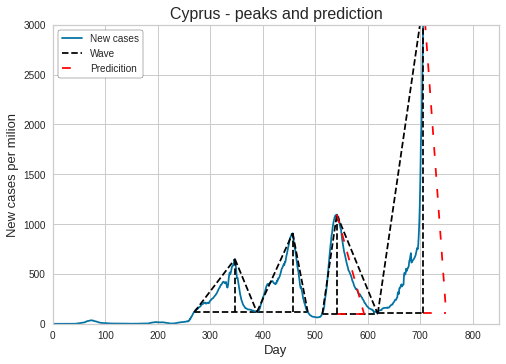



 peaks before removing subpeaks:  [279 402 673]
 subpeaks indexes:  []
 peaks:  [279 402 673]
 left angles:  [88.21539275 83.76266536 86.06101407]
 right angles:  [87.65049905 86.82761559]


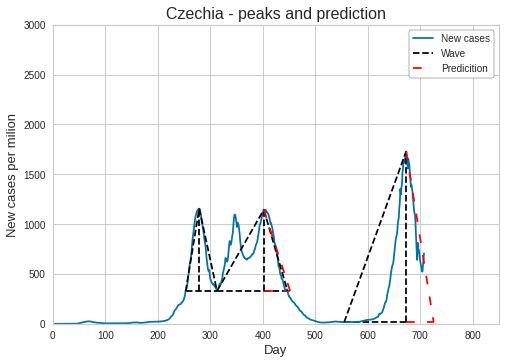



 peaks before removing subpeaks:  [ 72 328 475 572 706]
 subpeaks indexes:  []
 peaks:  [ 72 328 475 572 706]
 left angles:  [53.32386819 82.36582513 50.93375007 67.61386159 87.90533292]
 right angles:  [25.48635958 83.37305723 74.30977007 74.21748329]


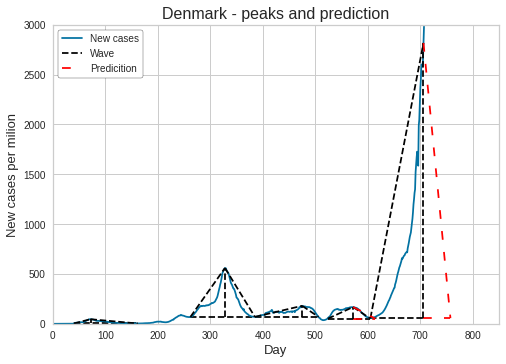



 peaks before removing subpeaks:  [ 69 346 414 645 706]
 subpeaks indexes:  [1, 4]
 peaks:  [ 69 414 645]
 left angles:  [55.07315809 82.70549282 84.3933072 ]
 right angles:  [26.30801079 85.84341318]


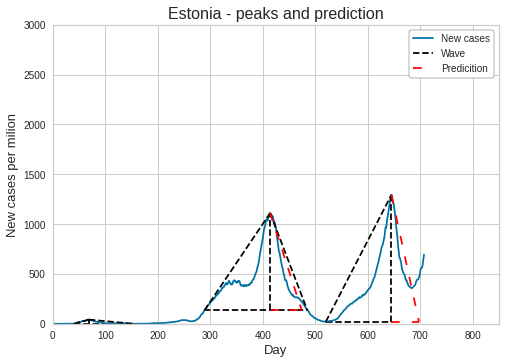



 peaks before removing subpeaks:  [314 415 563 706]
 subpeaks indexes:  [0]
 peaks:  [415 563 706]
 left angles:  [34.33070948 72.93408502 83.91759591]
 right angles:  [63.43563423 55.28234453]


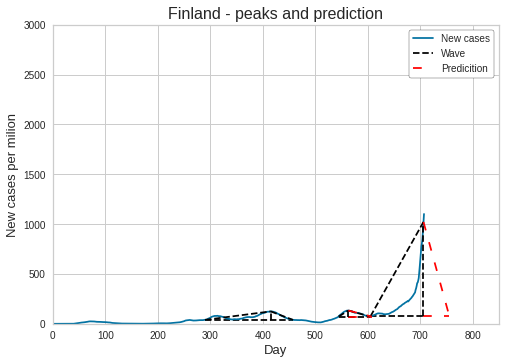



 peaks before removing subpeaks:  [ 82 283 430 564 706]
 subpeaks indexes:  []
 peaks:  [ 82 283 430 564 706]
 left angles:  [71.78196329 86.00677207 73.92136807 83.66473058 87.79105399]
 right angles:  [72.01228591 87.33452787 82.79809592 78.57188972]


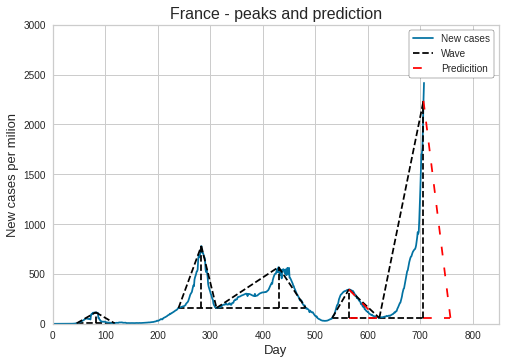



 peaks before removing subpeaks:  [315 474 572 654]
 subpeaks indexes:  []
 peaks:  [315 474 572 654]
 left angles:  [86.35471983 79.11326038 87.84144143 87.02432859]
 right angles:  [85.26187947 77.5316294  87.34877956]


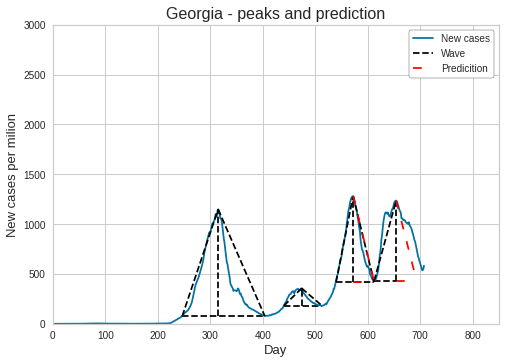



 peaks before removing subpeaks:  [ 66 329 451 674]
 subpeaks indexes:  []
 peaks:  [ 66 329 451 674]
 left angles:  [70.47643156 73.99880606 68.82055484 79.38256666]
 right angles:  [39.9346871  74.12719004 78.86476959]


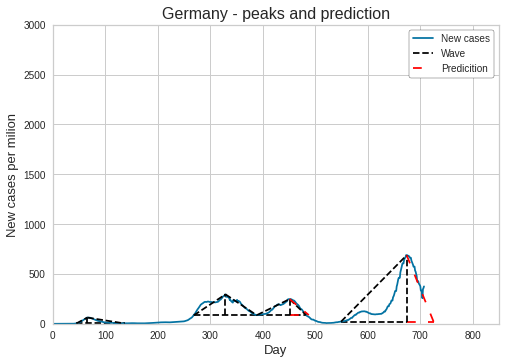



 peaks before removing subpeaks:  [295 435 572 706]
 subpeaks indexes:  []
 peaks:  [295 435 572 706]
 left angles:  [81.88330511 72.80637774 71.18724081 87.54415992]
 right angles:  [71.26618196 72.46505335 69.10729925]


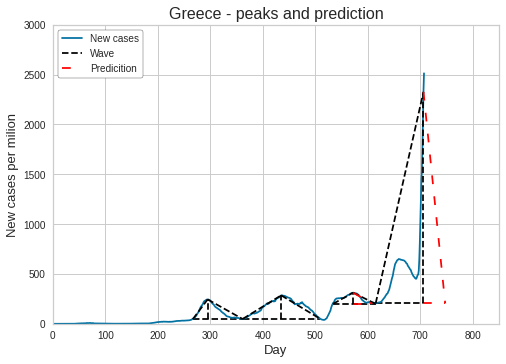



 peaks before removing subpeaks:  [312 427 671]
 subpeaks indexes:  []
 peaks:  [312 427 671]
 left angles:  [83.48036941 85.44941749 83.38051751]
 right angles:  [82.96903723 86.67700365]


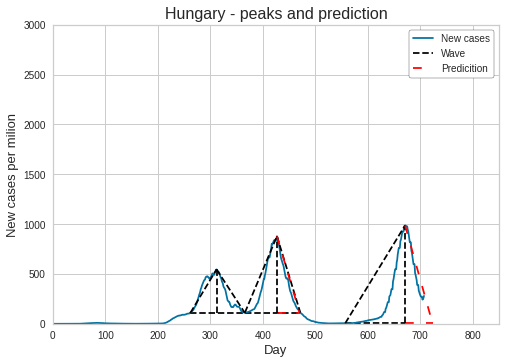



 peaks before removing subpeaks:  [ 63 262 557 706]
 subpeaks indexes:  []
 peaks:  [ 63 262 557 706]
 left angles:  [80.25557497 69.12040172 86.02577322 87.29684551]
 right angles:  [75.48383367 59.7938304  80.60037295]


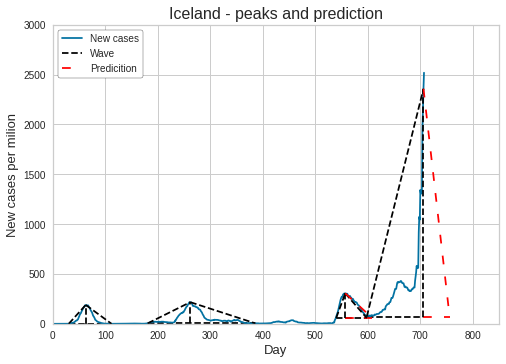



 peaks before removing subpeaks:  [ 84 270 351 574 706]
 subpeaks indexes:  []
 peaks:  [ 84 270 351 574 706]
 left angles:  [75.90021609 78.69606182 88.46097904 77.29913411 87.6953853 ]
 right angles:  [65.39881829 76.09952378 84.48374478 81.53464635]


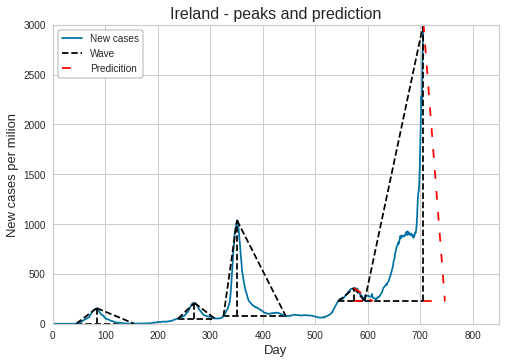



 peaks before removing subpeaks:  [ 62 294 417 579 706]
 subpeaks indexes:  []
 peaks:  [ 62 294 417 579 706]
 left angles:  [71.83196653 86.36852461 77.75939572 59.12830101 87.00433853]
 right angles:  [41.48763317 78.20896237 76.7238607  54.2438615 ]


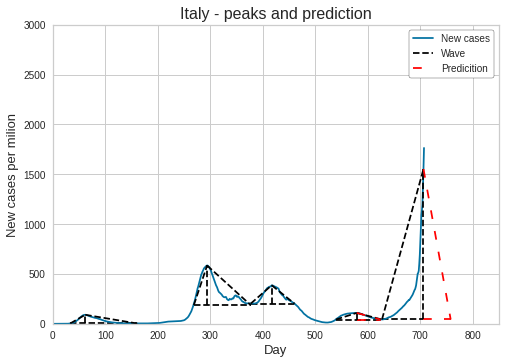



 peaks before removing subpeaks:  [346 467 639 706]
 subpeaks indexes:  [3]
 peaks:  [346 467 639]
 left angles:  [81.26936765 70.74617007 85.36751155]
 right angles:  [72.76479662 81.38651679]


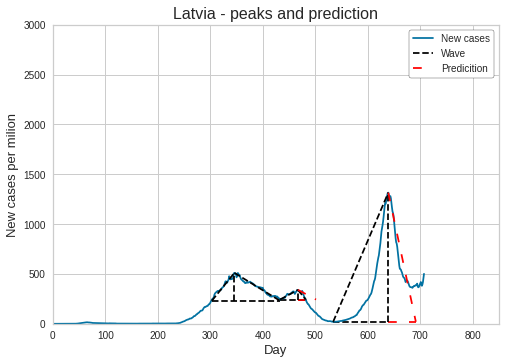



 peaks before removing subpeaks:  [329 467 641 706]
 subpeaks indexes:  [3]
 peaks:  [329 467 641]
 left angles:  [86.51213847 78.07822085 83.78167728]
 right angles:  [85.15701378 85.01437819]


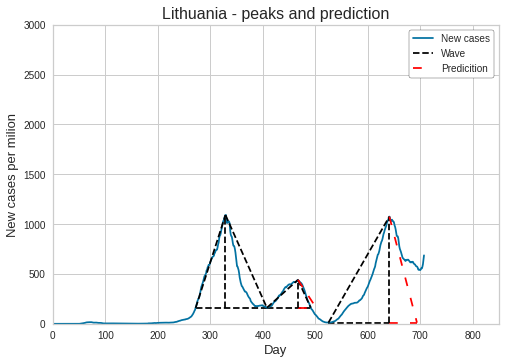



 peaks before removing subpeaks:  [297 432 576 653]
 subpeaks indexes:  [3]
 peaks:  [297 432 576]
 left angles:  [84.27355155 80.8199853  87.2459965 ]
 right angles:  [79.73029882 85.5043515 ]


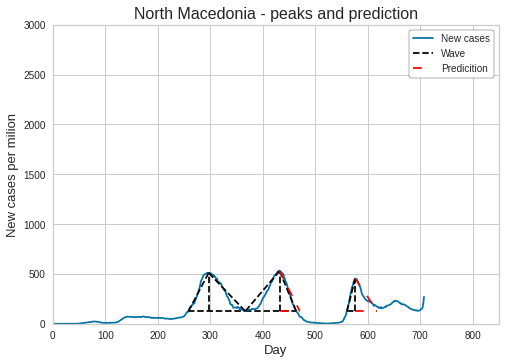



 peaks before removing subpeaks:  [146 256 316 424 634]
 subpeaks indexes:  [1]
 peaks:  [146 316 424 634]
 left angles:  [71.57558212 73.33047126 78.90011923 75.0299533 ]
 right angles:  [59.01453189 82.52332343 84.85082659]


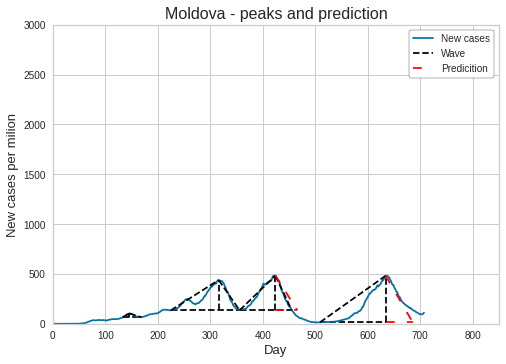



 peaks before removing subpeaks:  [ 78 330 453 538 674]
 subpeaks indexes:  []
 peaks:  [ 78 330 453 538 674]
 left angles:  [58.20552312 79.22832618 74.69485817 88.18635507 86.90342794]
 right angles:  [34.81532302 82.83115542 82.77460896 80.30296214]


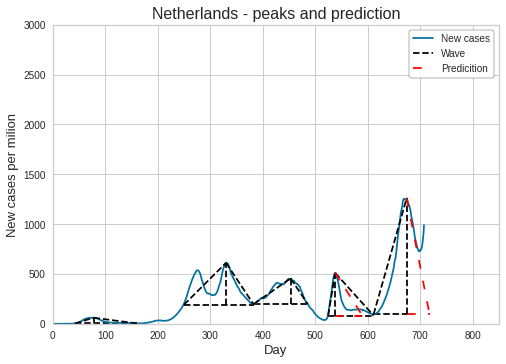



 peaks before removing subpeaks:  [ 64 346 421 588 690]
 subpeaks indexes:  []
 peaks:  [ 64 346 421 588 690]
 left angles:  [57.25636038 42.04375885 72.28315111 81.40481508 85.47490921]
 right angles:  [22.48224055 63.98364377 58.5772379  78.36935203]


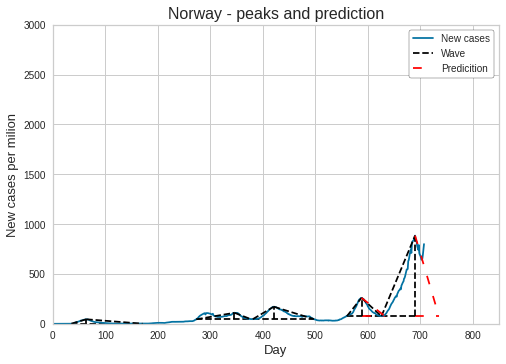



 peaks before removing subpeaks:  [291 430 676]
 subpeaks indexes:  []
 peaks:  [291 430 676]
 left angles:  [86.52924791 84.37671071 77.89506403]
 right angles:  [80.00833916 86.33158865]


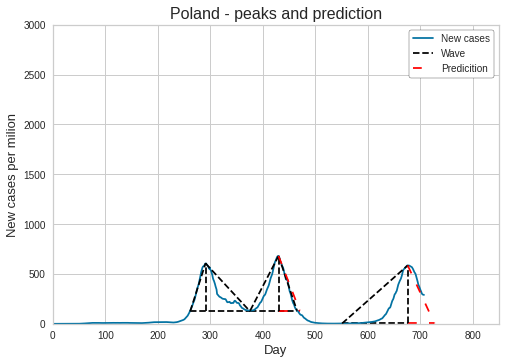



 peaks before removing subpeaks:  [ 71 295 366 542 706]
 subpeaks indexes:  [1]
 peaks:  [ 71 366 542 706]
 left angles:  [74.87080711 83.72562786 80.25283642 87.12458305]
 right angles:  [27.04667264 87.74531416 73.22841329]


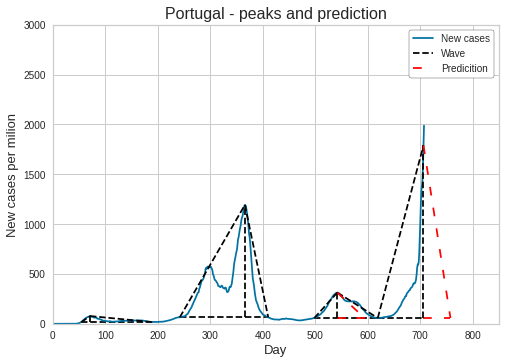



 peaks before removing subpeaks:  [294 428 635 706]
 subpeaks indexes:  [3]
 peaks:  [294 428 635]
 left angles:  [82.88507522 73.5701357  81.96664517]
 right angles:  [74.34086653 80.54941548]


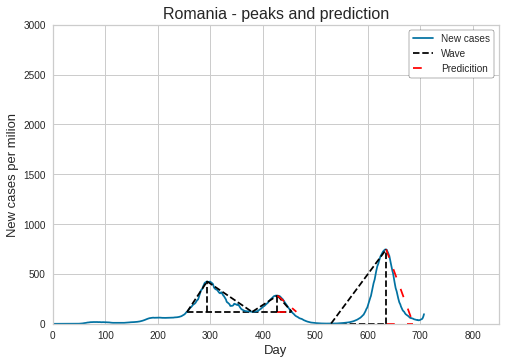



 peaks before removing subpeaks:  [106 335 537 652]
 subpeaks indexes:  []
 peaks:  [106 335 537 652]
 left angles:  [65.67843786 58.00267178 65.53899576 67.08954062]
 right angles:  [21.00428941 47.49566788 40.72962605]


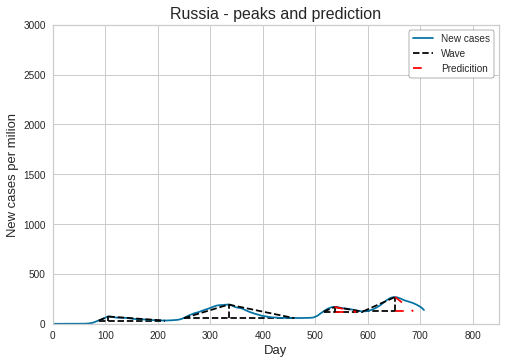



 peaks before removing subpeaks:  [ 83 181 314 422 608 706]
 subpeaks indexes:  [5]
 peaks:  [ 83 181 314 422 608]
 left angles:  [58.49445173 47.52878386 87.81685724 83.35028918 84.89829778]
 right angles:  [42.39891983 37.32379516 86.46673802 85.20182714]


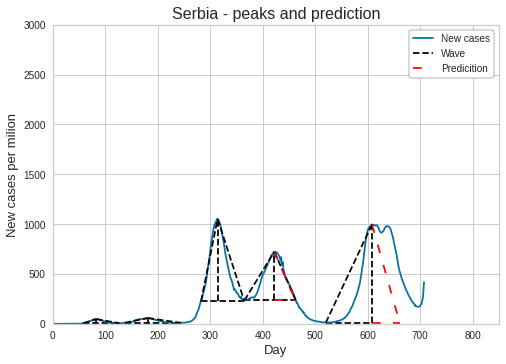



 peaks before removing subpeaks:  [280 347 673]
 subpeaks indexes:  [0]
 peaks:  [347 673]
 left angles:  [85.00311392 86.41071271]
 right angles:  [83.32824973]


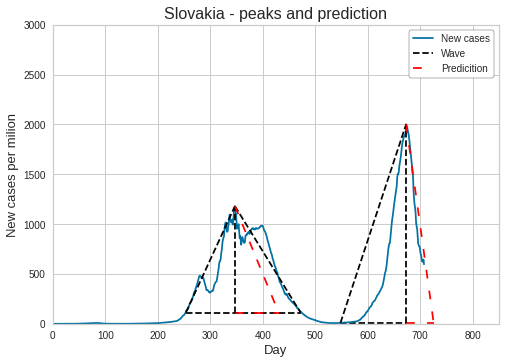



 peaks before removing subpeaks:  [280 346 430 657]
 subpeaks indexes:  [0, 2]
 peaks:  [346 657]
 left angles:  [82.06871038 85.35156059]
 right angles:  [78.0107499]


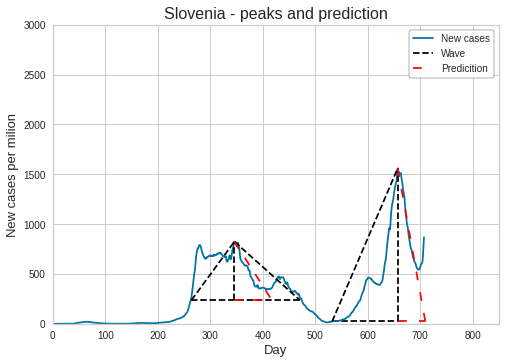



 peaks before removing subpeaks:  [ 66 284 363 450 543 706]
 subpeaks indexes:  []
 peaks:  [ 66 284 363 450 543 706]
 left angles:  [81.22902992 75.92625303 85.62524513 70.68395817 86.2242685  88.02511115]
 right angles:  [58.94417305 83.48003006 86.58187465 66.39457647 83.39915698]


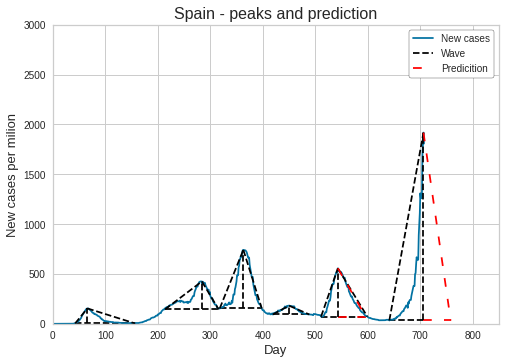



 peaks before removing subpeaks:  [146 345 443 593 706]
 subpeaks indexes:  []
 peaks:  [146 345 443 593 706]
 left angles:  [43.82251551 81.15670885 78.32547726 53.51895687 83.35957701]
 right angles:  [50.44245713 85.30579006 83.06821746 54.02389642]


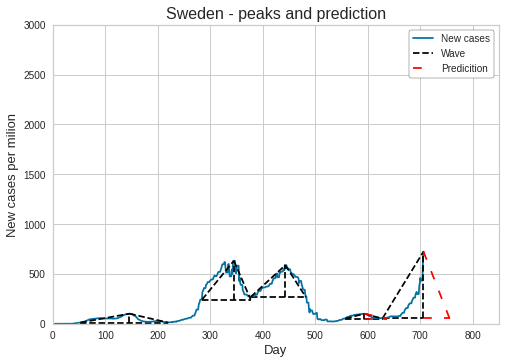



 peaks before removing subpeaks:  [ 63 282 445 599 706]
 subpeaks indexes:  []
 peaks:  [ 63 282 445 599 706]
 left angles:  [77.23884689 88.19688291 70.28532121 79.86397394 87.15084707]
 right angles:  [62.0642402  81.88431267 76.55612391 83.19588952]


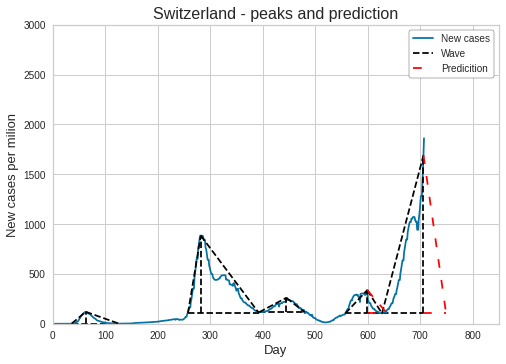



 peaks before removing subpeaks:  [ 82 314 447 560 625 706]
 subpeaks indexes:  [3]
 peaks:  [ 82 314 447 625 706]
 left angles:  [63.45561201 87.68533886 82.3700622  62.72043914 86.08275488]
 right angles:  [23.19052252 80.99258443 85.13107706 64.42328132]


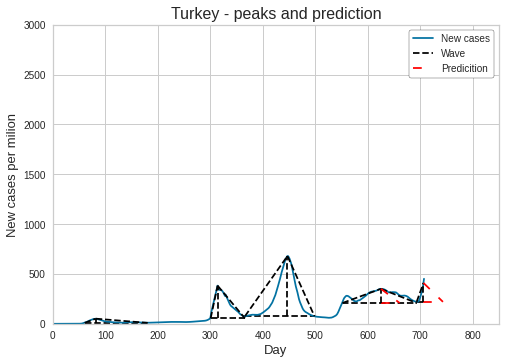



 peaks before removing subpeaks:  [309 440 646]
 subpeaks indexes:  []
 peaks:  [309 440 646]
 left angles:  [76.81926006 78.04955243 77.4047113 ]
 right angles:  [74.51222924 81.30470073]


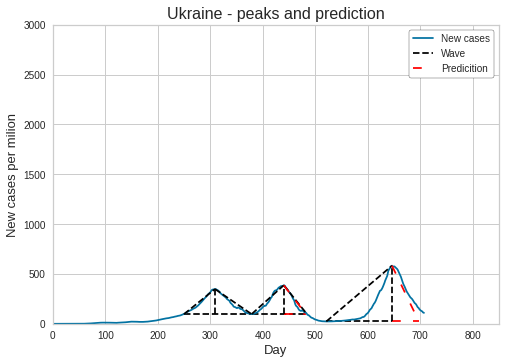



 peaks before removing subpeaks:  [ 90 347 540 636 706]
 subpeaks indexes:  [3]
 peaks:  [ 90 347 540 706]
 left angles:  [57.24172465 81.38091226 86.81618731 86.82544544]
 right angles:  [41.36388631 81.73250402 86.09718467]


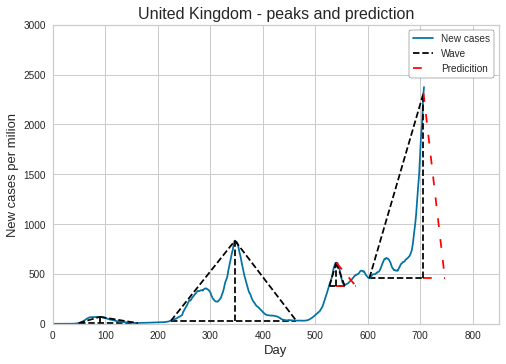

In [ ]:
#@title
waves_df = pd.DataFrame()
train_df = pd.DataFrame()
predict_df = pd.DataFrame()
validate_df = pd.DataFrame()

for country in europe_df_rolled.columns:
  tmp_df = europe_df_rolled[country].copy().reset_index(drop=True)

  #temporary changing first and last row for better peaks extraction
  first_day = float(tmp_df.iloc[:1])
  last_day = float(tmp_df.iloc[-1:])

  tmp_df[0] = 0
  tmp_df[len(tmp_df)-1] = 0

  peaks, _ = find_peaks(tmp_df, prominence=35, distance=60)

  results_full = peak_widths(tmp_df, peaks, rel_height=1, wlen=250)
  results_full[0]

  print("\n")
  print("\033[1m peaks before removing subpeaks: \033[0m", peaks, sep=' ')

  #removing subpeaks
  if len(peaks) > 1:
    index_to_del = []
    #if first peak is inside right part of next peak  
    if results_full[2][0] >= results_full[2][1] and results_full[3][0] <= results_full[3][1]:
      index_to_del.append(0)

    for iterator in range(1, len(peaks)-1):
      #if peak is inside left part of previous peak
      if results_full[2][iterator] >= results_full[2][iterator-1] and results_full[3][iterator] <= results_full[3][iterator-1]:
        index_to_del.append(iterator)

      #if peak is inside right part of next peak  
      if results_full[2][iterator] >= results_full[2][iterator+1] and results_full[3][iterator] <= results_full[3][iterator+1]:
        index_to_del.append(iterator)

    iterator = len(peaks)-1
    #if last peak is inside left part of previous peak
    if results_full[2][iterator] >= results_full[2][iterator-1] and results_full[3][iterator] <= results_full[3][iterator-1]:
      index_to_del.append(iterator)
    
    index_to_del = list(set(index_to_del))
    print("\033[1m subpeaks indexes: \033[0m", index_to_del, sep=' ')

    peaks = np.delete(peaks, index_to_del)
    results_full = np.delete(np.array(results_full), index_to_del, axis=1)

    print("\033[1m peaks: \033[0m", peaks, sep=' ')



  #calculating triangle points
  base_left_point = dict()
  base_left_point['x'] = results_full[2]
  base_left_point['y'] = tmp_df[base_left_point['x'].astype(int)].values

  base_right_point = dict()
  base_right_point['x'] = results_full[3]
  base_right_point['y'] = base_left_point['y']

  peak_point = dict()
  peak_point['x'] = peaks
  peak_point['y'] = tmp_df[peaks].values

  #calculating the length of the sides of the triangle
  real_height = peak_point['y'] - base_left_point['y']
  left_side_base = peak_point['x'] - base_left_point['x']
  right_side_base = base_right_point['x'] - peak_point['x']

  #calculating angles
  left_angle = np.degrees(np.arctan(real_height/left_side_base))
  right_angle = np.degrees(np.arctan(real_height/right_side_base))

  #removing last right sides because this is unknown
  right_side_base = right_side_base[:-1]
  right_angle = right_angle[:-1]
  
  print("\033[1m left angles: \033[0m", left_angle, sep=' ')
  print("\033[1m right angles: \033[0m", right_angle, sep=' ')

  #saving wave data
  wave_column, train_column, predict_column, validate_column = create_wave_df_column(country, real_height, left_side_base, right_side_base, base_left_point['x'], base_left_point['y'])
  waves_df = pd.merge(left=waves_df, right=wave_column, how="outer", left_index=True, right_index=True, sort=False)
  train_df = pd.merge(left=train_df, right=train_column, how="outer", left_index=True, right_index=True, sort=False)
  predict_df = pd.merge(left=predict_df, right=predict_column, how="outer", left_index=True, right_index=True, sort=False)
  validate_df = pd.merge(left=validate_df, right=validate_column, how="outer", left_index=True, right_index=True, sort=False)


  #returing original data for plotting
  tmp_df[0] = first_day
  tmp_df[len(tmp_df)-1] = last_day
  
  #ploting
  plt.plot(tmp_df, label='New cases')
  plt.title(f"{country} - peaks and prediction", fontsize=16)
  plt.ylim([0,3000])
  plt.xlim([0,850])
  plt.xlabel('Day', fontsize=13)
  plt.ylabel('New cases per milion', fontsize=13)

  for iterator in range(len(peaks)-1):
    plt.plot([base_left_point['x'][iterator], peak_point['x'][iterator]], 
             [base_left_point['y'][iterator], peak_point['y'][iterator]], 
             color='black', linestyle='--')
    
    plt.plot([peak_point['x'][iterator], base_right_point['x'][iterator]], 
             [peak_point['y'][iterator], base_right_point['y'][iterator]], 
             color='black', linestyle='--')
    
    plt.plot([peak_point['x'][iterator], peak_point['x'][iterator]], 
             [base_left_point['y'][iterator], peak_point['y'][iterator]], 
             color='black', linestyle='--')
    
    plt.hlines(base_left_point['y'][iterator], 
               base_left_point['x'][iterator], 
               base_right_point['x'][iterator], 
               color='black', linestyle='--')
  

  #last peak only have left side because right is unknown
  iterator = len(peaks)-1
  plt.plot([base_left_point['x'][iterator], peak_point['x'][iterator]], 
           [base_left_point['y'][iterator], peak_point['y'][iterator]], 
           color='black', linestyle='--', label='Wave')
  
  plt.plot([peak_point['x'][iterator], peak_point['x'][iterator]], 
           [base_left_point['y'][iterator], peak_point['y'][iterator]], 
           color='black', linestyle='--')
  
  plt.hlines(base_left_point['y'][iterator], 
             base_left_point['x'][iterator], 
             peak_point['x'][iterator], 
             color='black', linestyle='--')
  
  #predictions
  plt.plot([peak_point['x'][iterator], peak_point['x'][iterator] + predictions.T[country]], 
           [peak_point['y'][iterator], base_left_point['y'][iterator]], 
           color='red', linestyle=(0, (5, 7)), label='Predicition')

  plt.hlines(base_left_point['y'][iterator], 
             peak_point['x'][iterator], 
             peak_point['x'][iterator] + predictions.T[country],
             color='red', linestyle=(0, (5, 7)))
  
  #validation
  iterator = len(peaks)-2
  plt.plot([peak_point['x'][iterator], peak_point['x'][iterator] + validation.T[country]], 
           [peak_point['y'][iterator], base_left_point['y'][iterator]], 
           color='red', linestyle=(0, (5, 6)))

  plt.hlines(base_left_point['y'][iterator], 
             peak_point['x'][iterator], 
             peak_point['x'][iterator] + validation.T[country],
             color='red', linestyle=(0, (5, 6)))
  
  plt.legend(frameon=True, framealpha=1, edgecolor='black')
  plt.show()

Kmeans, hclust for triangles

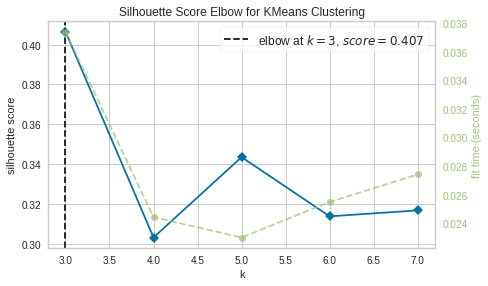

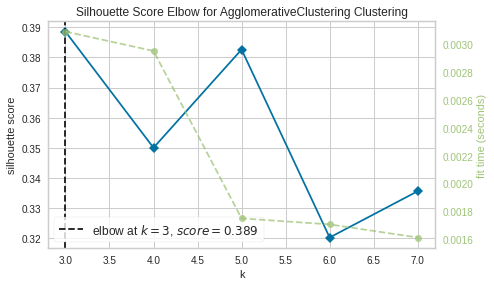

In [ ]:
#@title
#Silhouette Score for K means
model = KMeans(random_state=100)

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(waves_df.fillna(0).T)
visualizer.show()

#Silhouette Score for Hierarchical clustering
model = AgglomerativeClustering(linkage='ward', affinity='euclidean')

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(waves_df.fillna(0).T)        
visualizer.show()

3 clusters: 
Cluster 1: 
['Austria', 'Belgium', 'Cyprus', 'Greece', 'Iceland', 'Portugal', 'United Kingdom']
Cluster 2: 
['Denmark', 'France', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Serbia', 'Sweden', 'Switzerland']
Cluster 3: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'North Macedonia', 'Moldova', 'Poland', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Turkey', 'Ukraine']


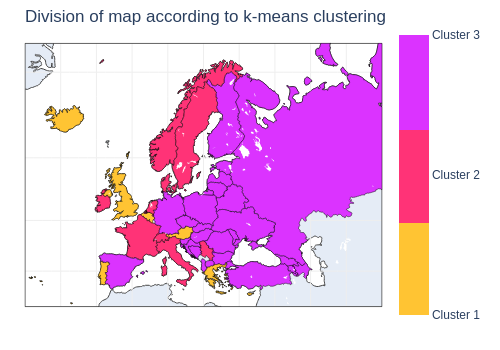

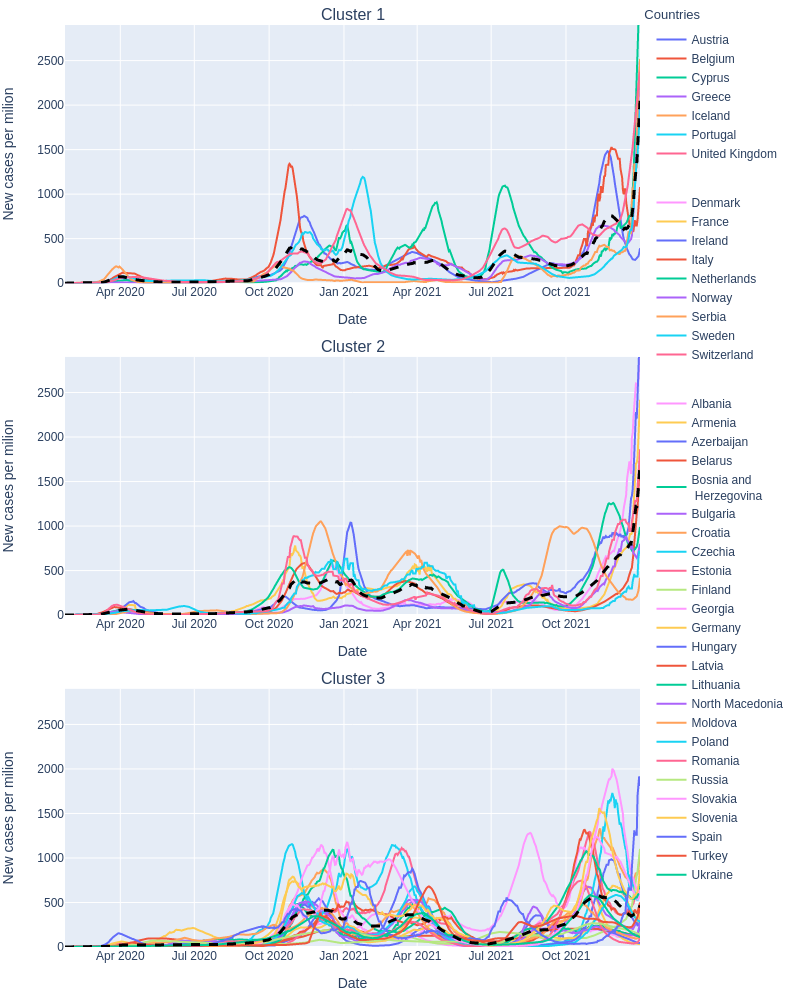

In [ ]:
#@title
#n+1 number of clusters
n=2
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = KMeans(n_clusters=n+1, random_state=100).fit(waves_df.fillna(0).T)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)

clusters_list_km_triangle = clusters_list.copy()


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.33, "rgb(255, 196, 51)"),
              (0.33, "rgb(255, 51, 119)"), (0.66, "rgb(255, 51, 119)"),
              (0.66, "rgb(219, 51, 255)"),  (1.00, "rgb(219, 51, 255)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=3, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to k-means clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.08)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1000, width=800, margin=config_margin, legend_tracegroupgap=30, title=config_title)
display(Image(fig2.to_image()))

print("\n")

3 clusters: 
Cluster 1: 
['Denmark', 'France', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Serbia', 'Spain', 'Sweden', 'Switzerland', 'Turkey']
Cluster 2: 
['Austria', 'Belgium', 'Cyprus', 'Greece', 'Iceland', 'Portugal', 'United Kingdom']
Cluster 3: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'North Macedonia', 'Moldova', 'Poland', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Ukraine']


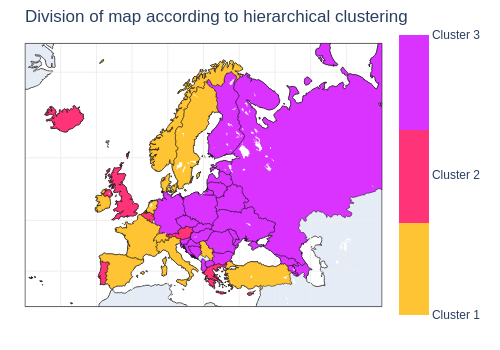

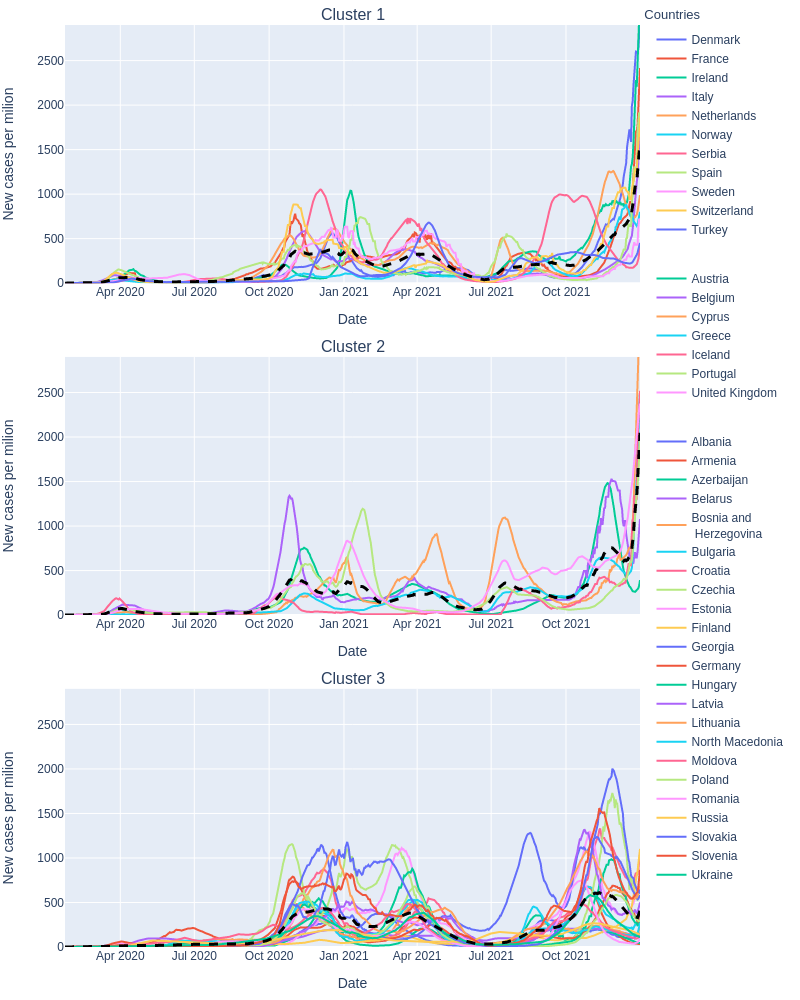

In [ ]:
#@title
#n+1 number of clusters
n=2
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = AgglomerativeClustering(n_clusters=n+1, linkage='ward', affinity='euclidean').fit(waves_df.fillna(0).T)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.33, "rgb(255, 196, 51)"),
              (0.33, "rgb(255, 51, 119)"), (0.66, "rgb(255, 51, 119)"),
              (0.66, "rgb(219, 51, 255)"),  (1.00, "rgb(219, 51, 255)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=3, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to hierarchical clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.08)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1000, width=800, margin=config_margin, legend_tracegroupgap=30, title=config_title)
display(Image(fig2.to_image()))

print("\n")

Kmeans, hclust for pca+triangles

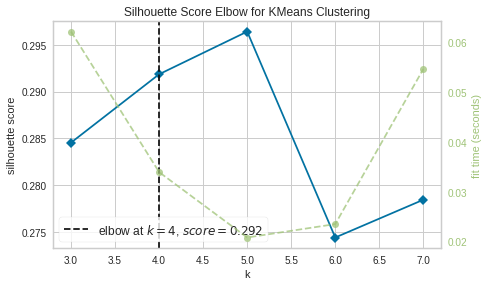

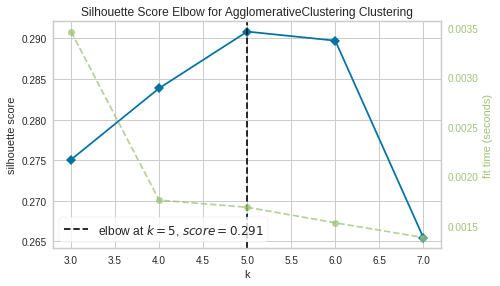

In [ ]:
#@title
#Silhouette Score for K means
model = KMeans(random_state=100)

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(pca_waves_df)
visualizer.show()

#Silhouette Score for Hierarchical clustering
model = AgglomerativeClustering(linkage='ward', affinity='euclidean')

visualizer = KElbowVisualizer(model, k=(3,8),metric='silhouette', timings= True, size=(500, 300))
visualizer.fit(pca_waves_df)        
visualizer.show()

5 clusters: 
Cluster 1: 
['Austria', 'Belgium', 'Croatia', 'Georgia', 'Netherlands', 'Slovenia']
Cluster 2: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Finland', 'Germany', 'Hungary', 'Italy', 'North Macedonia', 'Moldova', 'Norway', 'Poland', 'Romania', 'Russia', 'Sweden', 'Turkey', 'Ukraine']
Cluster 3: 
['Czechia', 'Slovakia']
Cluster 4: 
['Cyprus', 'Denmark', 'France', 'Greece', 'Iceland', 'Ireland', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom']
Cluster 5: 
['Estonia', 'Latvia', 'Lithuania', 'Serbia']


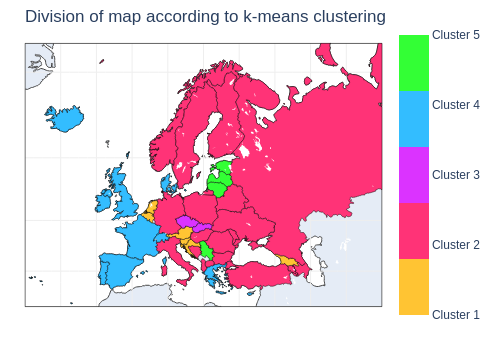

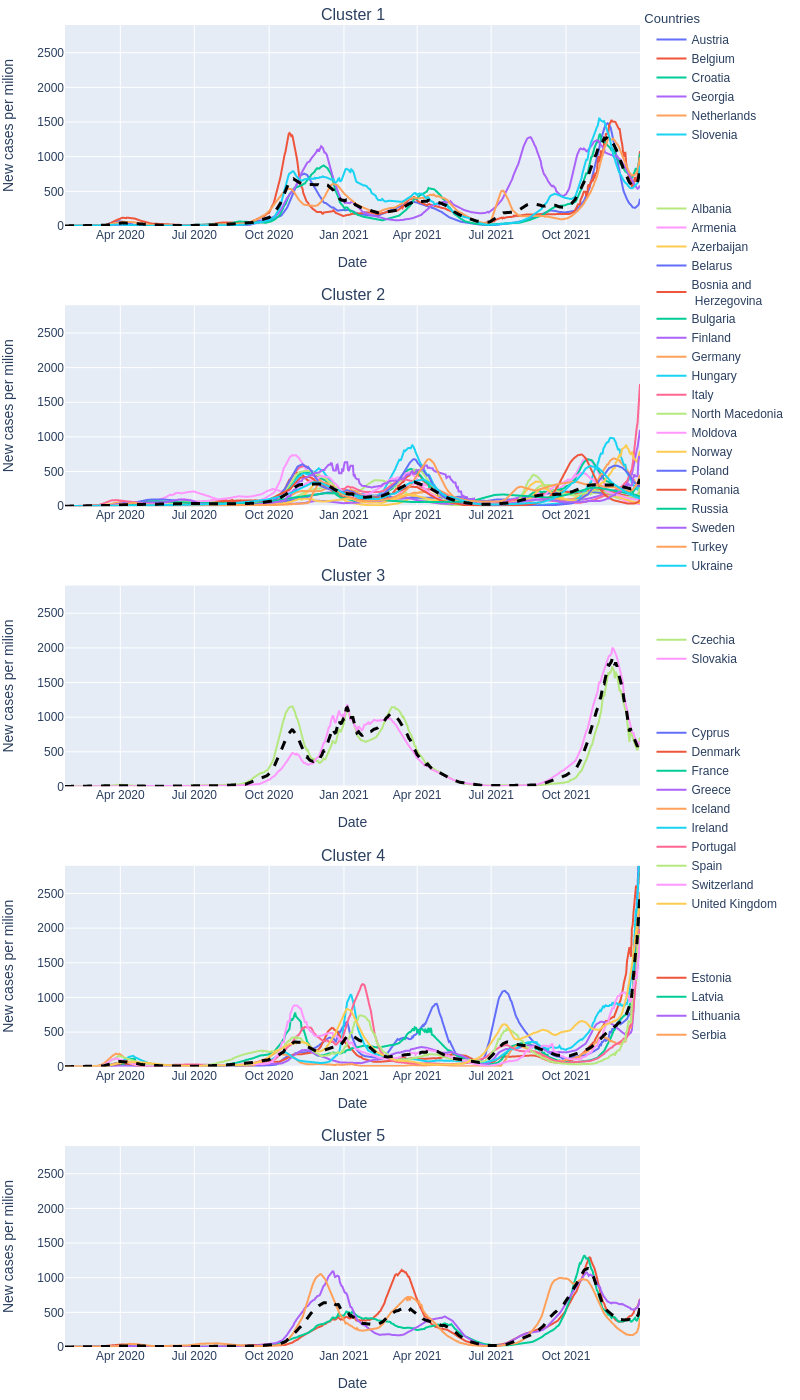

In [ ]:
#@title
#n+1 number of clusters
n=4
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = KMeans(n_clusters=n+1, random_state=100).fit(pca_waves_df)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)

clusters_list_km_pca_triangle = clusters_list.copy()


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.2, "rgb(255, 196, 51)"),
              (0.2, "rgb(255, 51, 119)"), (0.4, "rgb(255, 51, 119)"),
              (0.4, "rgb(219, 51, 255)"),  (0.6, "rgb(219, 51, 255)"),
              (0.6, "rgb(51, 189, 255)"),  (0.8, "rgb(51, 189, 255)"),
              (0.8, "rgb(51, 255, 53)"),  (1.0, "rgb(51, 255, 53)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=5, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to k-means clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.06)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1400, width=800, margin=config_margin, legend_tracegroupgap=55, title=config_title)
display(Image(fig2.to_image()))

print("\n")

5 clusters: 
Cluster 1: 
['Austria', 'Belgium', 'Croatia', 'Georgia', 'Netherlands', 'Slovenia']
Cluster 2: 
['Cyprus', 'Denmark', 'France', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Portugal', 'Spain', 'Switzerland', 'United Kingdom']
Cluster 3: 
['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Finland', 'Germany', 'Hungary', 'North Macedonia', 'Moldova', 'Norway', 'Poland', 'Romania', 'Russia', 'Sweden', 'Turkey', 'Ukraine']
Cluster 4: 
['Czechia', 'Slovakia']
Cluster 5: 
['Estonia', 'Latvia', 'Lithuania', 'Serbia']


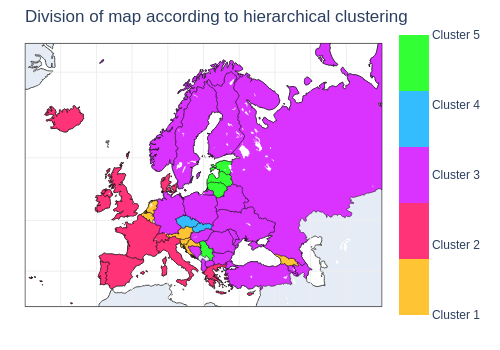

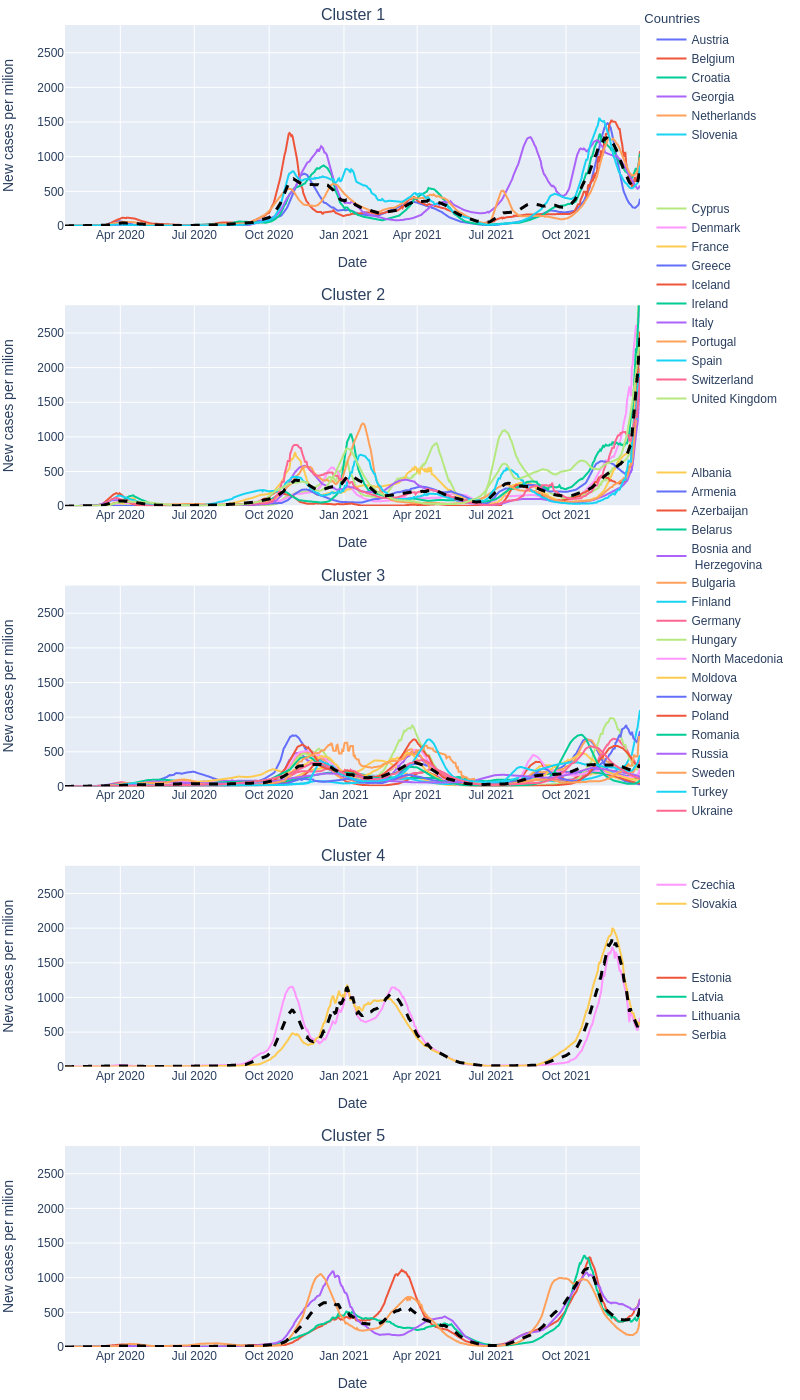

In [ ]:
#@title
#n+1 number of clusters
n=4
print("\033[1m" + f"{n+1} clusters: " + "\033[0m")
kmeans = AgglomerativeClustering(n_clusters=n+1, linkage='ward', affinity='euclidean').fit(pca_waves_df)
kmeans.labels_

clusters_list = []
#loop responsible for creating list of lists of countries splited by clustering and printing them
for iterator in range(n+1):
  print(f"Cluster {iterator+1}: ")
  cluster_list = []
  for iterator2, country in enumerate(data.index):
    if kmeans.labels_[iterator2] == iterator:
      cluster_list.append(country)
  print(cluster_list, end="\n")
  clusters_list.append(cluster_list)


#setting choropleth parameters
config = dict(
  type = 'choropleth',
  locations = data.index.values,
  locationmode='country names',
  z=np.append(kmeans.labels_+1, n+1).astype(int),
  colorscale=[(0.00, "rgb(255, 196, 51)"),   (0.2, "rgb(255, 196, 51)"),
              (0.2, "rgb(255, 51, 119)"), (0.4, "rgb(255, 51, 119)"),
              (0.4, "rgb(219, 51, 255)"),  (0.6, "rgb(219, 51, 255)"),
              (0.6, "rgb(51, 189, 255)"),  (0.8, "rgb(51, 189, 255)"),
              (0.8, "rgb(51, 255, 53)"),  (1.0, "rgb(51, 255, 53)")],
  marker_line_color='black',
  marker_line_width=0.5,
  colorbar=dict(nticks=5, tickprefix='Cluster ')
  )

config_coloraxis=dict(
  tickvals=[el for el in range(1,n+2)], 
  title='Clusters', 
  ticks='outside'
  )

config_margin=dict(
  r=25, 
  t=25, 
  l=25,
  b=25
  )

#plotting first part of the figure
fig = go.Figure(data=[config])
fig.update_geos(scope='world', lataxis_showgrid=True, lonaxis_showgrid=True, 
                projection_type='mercator', lataxis_range=[40,75], lonaxis_range=[-30, 70], 
                lataxis_dtick=10, lonaxis_dtick=10, resolution=50)
fig.update_layout(height=350, width=500, margin=config_margin, 
                  coloraxis_colorbar=config_coloraxis, title='Division of map according to hierarchical clustering', title_y=0.97)
display(Image(fig.to_image()))

#setting legend title parameters(broken method)
config_title=dict(
  text='Countries', 
  x=0.875, 
  y=0.99,
  font_size=13, 
  font_family='Arial'
)

#plotting second part of the figure
fig2 = subplots.make_subplots(rows=int(n+1), cols=1, subplot_titles=[f"Cluster {iterator + 1}" for iterator in range(len(clusters_list))], vertical_spacing=0.06)
for iterator, cluster in enumerate(clusters_list):
  #calculating mean for each cluster
  frame = pd.DataFrame(np.mean(europe_df_rolled[cluster], axis=1), 
                      columns=['Mean'], index=europe_df_rolled.index)
  for country in cluster:
    #breaking long country names
    if country == 'Bosnia and Herzegovina':
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name='Bosnia and<br> Herzegovina', legendgroup=iterator), row=int(iterator)+1, col=1)
    else:
      fig2.add_trace(go.Scatter(x=europe_df_rolled.index, y=europe_df_rolled[country], name=country, legendgroup=iterator), row=int(iterator)+1, col=1)
    fig2.update_xaxes(title_text='Date', row=int(iterator)+1, col=1)
    fig2.update_yaxes(title_text='New cases per milion', row=int(iterator)+1, col=1, range=[0,2900])
    
  #adding trace of mean
  fig2.add_trace(go.Scatter(x=frame.index, y=frame['Mean'], name='Mean', 
                            line=dict(color='black', width=3, dash='dash'), legendgroup=iterator, showlegend=False), 
                 row=int(iterator)+1, col=1)

    
fig2.update_layout(height=1400, width=800, margin=config_margin, legend_tracegroupgap=55, title=config_title)
display(Image(fig2.to_image()))

print("\n")